In [ ]:
#Breast Cancer detection using Pyhton and Machine Learning

In [ ]:
#import libraries

import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt #Helps in plotting graphs
import seaborn as sns #For data visualization and exploratory data analysis

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv.csv')
df.head(6)

Saving data.csv.csv to data.csv.csv


,ID,Diagnosis,Radius Mean,Texture Mean,Permiter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothnesss Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Factal Dimension Worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,0.11890,2019.0000,0.1622,0.66560,0.71190,0.2654,0.46010
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,0.08902,1956.0000,0.1238,0.18660,0.24160,0.1860,0.27500
2,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.60000,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
3,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.20000,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
4,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.50000,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183
5,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.90000,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773


In [ ]:
#Count the number of rows and columns in the data set
df.shape

(6, 32)

In [ ]:
#Count the number of empty(NaN, NaN, na) values in each column
df.isna().sum() #isna function to detect missing values

ID                        0
Diagnosis                 0
Radius Mean               0
Texture Mean              0
Permiter Mean             0
Area Mean                 0
Smoothness Mean           0
Compactness Mean          0
Concavity Mean            0
Concave Points Mean       0
Symmetry Mean             0
Fractal Dimension         0
Radius Se                 0
Texture Se                0
Perimeter Se              0
Area Se                   0
Smoothness Se             0
Compactness Se            0
Concavity Se              0
Concave Points Se         0
Symmetry Se               0
Factal Dimension Se       0
Radius Worst              0
Texture Worst             0
Perimeter Worst           0
Area Worst                0
Smoothnesss Worst         0
Compactness Worst         0
Concavity Worst           0
Concave Points Worst      0
Symmetry Worst            0
Factal Dimension Worst    0
dtype: int64

In [ ]:
#Drop the column with all missing values
df = df.dropna(axis=1) #function is used to remove rows and columns with null/nan values

In [ ]:
#Get new number of rows and cloumns
df.shape 

(6, 32)

In [ ]:
#Get a count of the number of Maligant (M) OR Benign (B) cells
df['Diagnosis'].value_counts() #value_counts() function returns object containing counts of unique values

M    3
B    3
Name: Diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


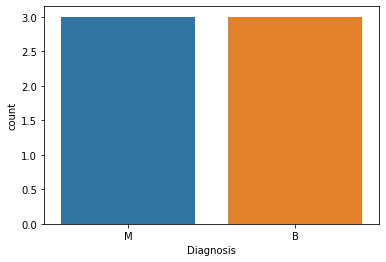

In [ ]:
#Visualize the count
sns.countplot(df['Diagnosis'],label='count')

#Seaborn counts the number of observations per category for a categorical variable
#Seaborn countplot() is a way to create a type of bar chart in Python

In [ ]:
#Look at the data types to see which columns need to be encoded
df.dtypes

ID                          int64
Diagnosis                  object
Radius Mean               float64
Texture Mean              float64
Permiter Mean             float64
Area Mean                 float64
Smoothness Mean           float64
Compactness Mean          float64
Concavity Mean            float64
Concave Points Mean       float64
Symmetry Mean             float64
Fractal Dimension         float64
Radius Se                 float64
Texture Se                float64
Perimeter Se              float64
Area Se                   float64
Smoothness Se             float64
Compactness Se            float64
Concavity Se              float64
Concave Points Se         float64
Symmetry Se               float64
Factal Dimension Se       float64
Radius Worst              float64
Texture Worst             float64
Perimeter Worst           float64
Area Worst                float64
Smoothnesss Worst         float64
Compactness Worst         float64
Concavity Worst           float64
Concave Points

In [ ]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder 

#skylearn.preprocessing provides several common utility functions and transformer classes to change raw feature vectors into a representation
#labelencoder is used to normalize labels (It is also transform non-numerical values to numerical values)

labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,1].values)

#fit_transform() ->  It is used on the training data so that we can scale the training data and also learn the scaling parameters.
#iloc ->  function enables us to select a particular cell of the dataset
#( that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.)
#values() -> returns a list of all the values available in a given dictionary.

df.iloc[:,1].values

array(['M', 'M', 'M', 'B', 'B', 'B'], dtype=object)

In [ ]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

df.iloc[:,1]

0    1
1    1
2    1
3    0
4    0
5    0
Name: Diagnosis, dtype: int64

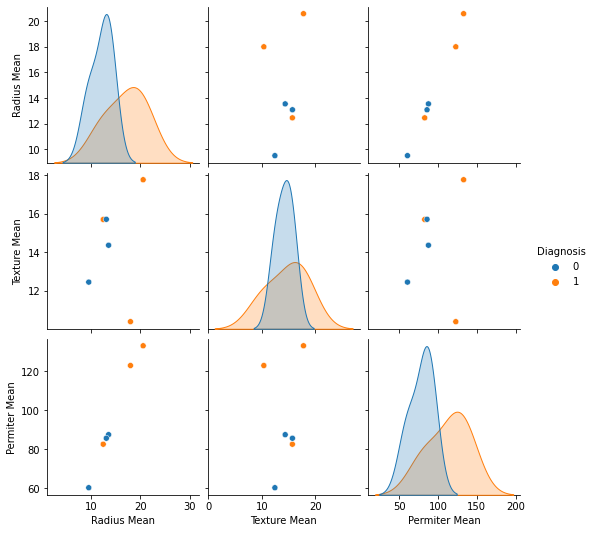

In [ ]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:5], hue='Diagnosis')

#hue -> This parameter take column name for colour encoding

In [ ]:
#Print the first 5 rows of the new data
df.head(6)

,ID,Diagnosis,Radius Mean,Texture Mean,Permiter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothnesss Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Factal Dimension Worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,0.11890,2019.0000,0.1622,0.66560,0.71190,0.2654,0.46010
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,0.08902,1956.0000,0.1238,0.18660,0.24160,0.1860,0.27500
2,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.60000,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
3,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.20000,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
4,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.50000,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183
5,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.90000,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773


In [ ]:
#Get the corelations of the columns
df.iloc[:,1:12].corr()

#correlations -> Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate).

,Diagnosis,Radius Mean,Texture Mean,Permiter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,Fractal Dimension
Diagnosis,1.000000,0.674733,0.092779,0.702763,0.674490,0.278394,0.572317,0.726066,0.794165,0.514363,0.333773
Radius Mean,0.674733,1.000000,0.220920,0.995766,0.993561,-0.347734,0.305780,0.470219,0.621126,0.263152,-0.236586
Texture Mean,0.092779,0.220920,1.000000,0.155330,0.235646,-0.416785,-0.553194,-0.527463,-0.413742,-0.617400,-0.599653
Permiter Mean,0.702763,0.995766,0.155330,1.000000,0.983293,-0.269748,0.391633,0.545395,0.685384,0.350643,-0.154197
Area Mean,0.674490,0.993561,0.235646,0.983293,1.000000,-0.404681,0.242543,0.423820,0.579812,0.197299,-0.267685
Smoothness Mean,0.278394,-0.347734,-0.416785,-0.269748,-0.404681,1.000000,0.717490,0.573234,0.431357,0.718430,0.909355
Compactness Mean,0.572317,0.305780,-0.553194,0.391633,0.242543,0.717490,1.000000,0.944238,0.884024,0.994737,0.794745
Concavity Mean,0.726066,0.470219,-0.527463,0.545395,0.423820,0.573234,0.944238,1.000000,0.981858,0.941499,0.659598
Concave Points Mean,0.794165,0.621126,-0.413742,0.685384,0.579812,0.431357,0.884024,0.981858,1.000000,0.874593,0.518320
Symmetry Mean,0.514363,0.263152,-0.617400,0.350643,0.197299,0.718430,0.994737,0.941499,0.874593,1.000000,0.788014


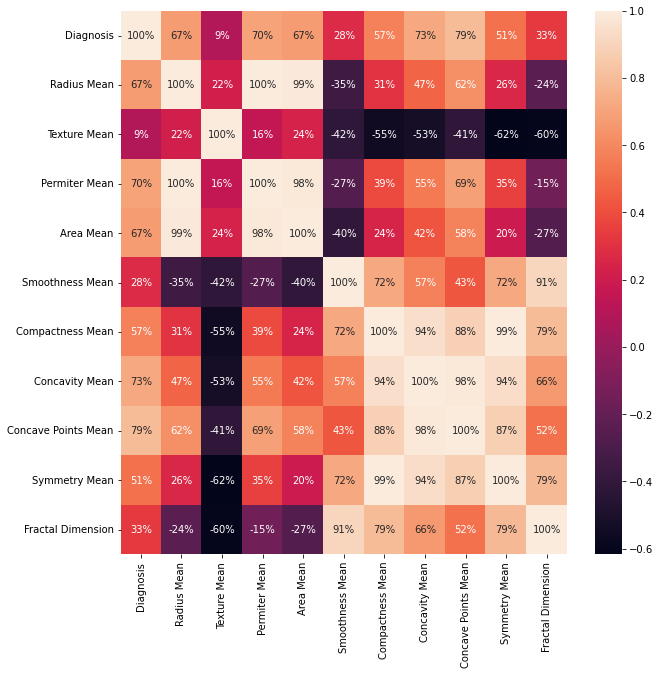

In [ ]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True, fmt='.0%')

# Heatmap -> a graphical representation of data using colors to visualize the value of the matrix.

In [ ]:
#Split the data set into independent (x) and dependent (Y) data sets
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

In [ ]:
#Split the data set into set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

#import train_test_split -> train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. 
# By default, Sklearn train_test_split will make random partitions for the two subsets.

In [ ]:
#Scale the data (Feature Scaling)

from sklearn.preprocessing import StandardScaler

#Standardscaler -> StandardScaler removes the mean and scales each feature/variable to unit variance.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train


array([[ 1.36778292,  1.19117178,  1.22574265,  1.42724875, -1.40088335,
        -0.77055073, -0.3710032 , -0.08727944, -0.88312235, -0.96260874,
         0.05652605, -0.88980136, -0.16238359,  0.13891132, -0.50817008,
        -0.73971494, -0.65048727,  0.33702662, -1.02406324, -0.0514341 ,
         0.96125927,  1.48952972,  0.63107063, -0.99644506,  0.96805652,
        -1.08167052, -0.6652636 , -0.18742834, -1.6056659 ],
       [-0.88146011, -0.07224837, -0.94127402, -0.86667599, -0.34825472,
        -0.73787546, -0.56917153, -0.59090997, -0.57429393, -0.85202183,
        -0.71290316, -0.07826098, -0.63644461, -0.77814842,  1.49602917,
        -0.6360389 , -0.29689594,  0.26516593, -0.0533794 , -0.83859939,
        -0.9400904 , -0.39078917, -0.92277893,  1.11628142, -0.99974243,
        -0.13955619, -0.40404357, -0.63551642,  0.61198951],
       [ 0.54231393, -1.54685605,  0.74407741,  0.44590672,  1.31417256,
         1.68268404,  1.71436148,  1.64547085,  1.68480706,  1.49934618,
  

In [ ]:
#Create a function for the models
#Random Forest Classification
#Support Vector Machines
#Kernel SVM 
#Logistic Regression 
#Decision Tree Algorithm 

def models(X_train, Y_train):

  
  
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)


 
  from sklearn.svm import SVC
  classifier = SVC(kernel = 'rbf', random_state = 0)
  classifier.fit(X_train, Y_train)

  
  from sklearn.svm import SVC
  classifier = SVC(kernel = 'rbf', random_state = 0)
  classifier.fit(X_train, Y_train)

 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)


  #Print the models accuracy on the training data
  print('[0]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  print('[1]Support Vector Machines Training Accuracy:', classifier.score(X_train, Y_train))
  print('[2]Kernel Support Vector Machines Training Accuracy:', classifier.score(X_train, Y_train))
  print('[3]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[4]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
 

  return forest, classifier,classifier, log, tree

In [ ]:
#Getting all of the models
model = models(X_train, Y_train)

[0]Random Forest Classifier Training Accuracy: 1.0
[1]Support Vector Machines Training Accuracy: 1.0
[2]Kernel Support Vector Machines Training Accuracy: 1.0
[3]Logistic Regression Training Accuracy: 1.0
[4]Decision Tree Classifier Training Accuracy: 1.0


In [ ]:
#test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range ( len(model)):
  print('Model', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy =', (TP+TN)/(TP+TN+FN+FP))
  print()

Model 0
[[1 0]
 [0 1]]
Testing Accuracy = 1.0

Model 1
[[1 0]
 [0 1]]
Testing Accuracy = 1.0

Model 2
[[1 0]
 [0 1]]
Testing Accuracy = 1.0

Model 3
[[1 0]
 [0 1]]
Testing Accuracy = 1.0

Model 4
[[1 0]
 [0 1]]
Testing Accuracy = 1.0



In [ ]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range ( len(model)):
  print('Model',i)
  print( classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

1.0

Model 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

1.0

Model 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1

In [ ]:
#Print the prediction of Random Forest Classifier Model
pred  = model[0].predict(X_test)
print(pred)
print()
print(Y_test)

[0 1]

[0 1]
